In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

file_name="B0005"

#loading data
file_1="C:/Users/tarak/Documents/project/Battery_est_V2/"+file_name+"_dis_dataset.csv"
dataset=pd.read_csv(file_1)

In [2]:
dataset["cycle"]

,cycle,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
10848,46,1.74185,4.199399,-0.000448,23.236214,0.0006,0.000,0.000
10849,46,1.74185,4.198836,-0.001274,23.245386,0.0008,4.214,9.390
10850,46,1.74185,4.005624,-2.014943,23.263015,1.9982,3.038,19.562
10851,46,1.74185,3.989934,-2.012637,23.325449,1.9982,3.018,28.890
10852,46,1.74185,3.977741,-2.014778,23.410170,1.9982,3.009,38.250
...,...,...,...,...,...,...,...,...
11193,46,1.74185,3.349627,-0.001192,36.734323,0.0006,0.000,3236.671
11194,46,1.74185,3.361903,-0.000418,36.619026,0.0006,0.000,3246.359
11195,46,1.74185,3.372716,-0.001175,36.457974,0.0006,0.000,3256.000
11196,46,1.74185,3.382731,-0.001838,36.251382,0.0006,0.000,3265.687


In [2]:
Soh=dataset["capacity"]/dataset["capacity"][0]
time=dataset[["time"]]

In [3]:
# normalising data
dataset=dataset[["cycle","capacity","voltage_measured","current_measured","temperature_measured","current_load","voltage_load"]]
df_norm = (dataset-dataset.min())/(dataset.max()-dataset.min())
df_norm["time"]=time
df_norm["Soh"]=Soh

In [4]:
att_=["cycle","capacity","voltage_measured","current_measured","temperature_measured","current_load","voltage_load","time"]
att=["cycle","temperature_measured","capacity","current_load"]
X_axis="cycle"

In [5]:
X = df_norm[att]
Y = df_norm[["Soh"]]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0) 

In [7]:
#sorting data wrt to index
X_test = X_test.sort_index(axis=0)
X_train= X_train.sort_index(axis=0)
y_train= y_train.sort_index(axis=0)
y_test = y_test.sort_index(axis=0)

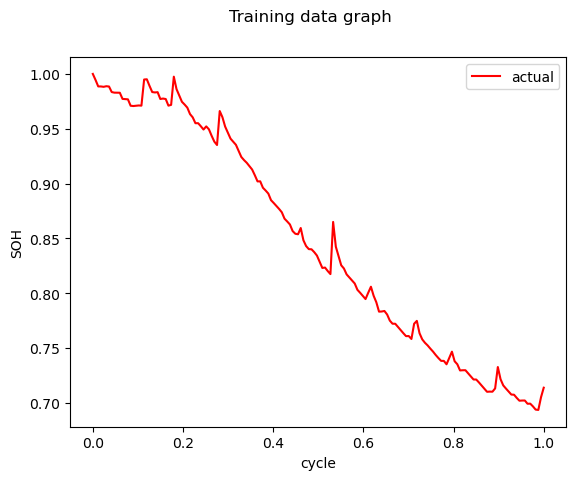

In [8]:
plt.plot(X_train[X_axis],y_train,color='red',label='actual')
plt.xlabel("cycle")
plt.ylabel("SOH")
plt.legend()
plt.suptitle("Training data graph")
plt.show()

In [9]:
#making models
regressor1 = RandomForestRegressor(n_estimators=100,random_state=0)
regressor1.fit(X_train,y_train.values.ravel())
y_pred_1= regressor1.predict(X_test)

In [10]:
regressor2 = RandomForestRegressor(n_estimators=50,random_state=0)
regressor2.fit(X_train,y_train.values.ravel())            
y_pred_2= regressor2.predict(X_test)

In [11]:
regressor3 = RandomForestRegressor(n_estimators=30,random_state=0)
regressor3.fit(X_train,y_train.values.ravel())
y_pred_3= regressor3.predict(X_test)

In [17]:
def graph_plot(b,a,model):
    plt.plot(X_test[b],y_test,color='red',label='actual')
    plt.plot(X_test[b],a,color='cyan',label='Node_'+model)
    plt.xlabel("cycle")
    plt.ylabel("SOH")
    rmse="Rmse = "+str(np.sqrt(metrics.mean_squared_error(y_test, a)))
    plt.figtext(0.33, -0.03, rmse, fontsize=10)
    plt.legend(loc="upper right")
    plt.suptitle("random forest regressor node:"+model)
    plt.show()
    print(np.sqrt(metrics.mean_squared_error(y_test, a)))

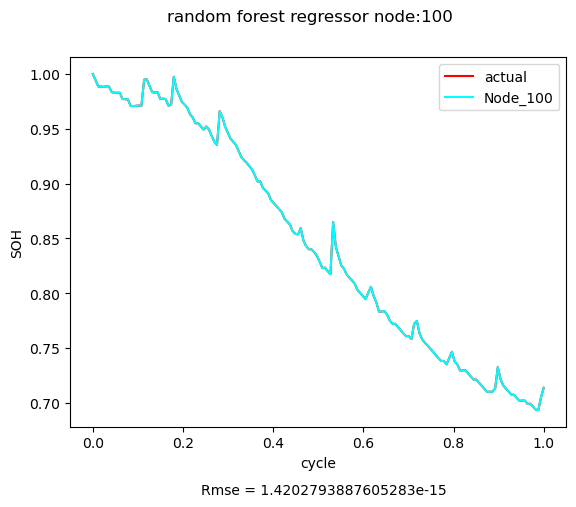

1.4202793887605283e-15


In [18]:
graph_plot(X_axis,y_pred_1,"100")#3.2884697372590476e-07

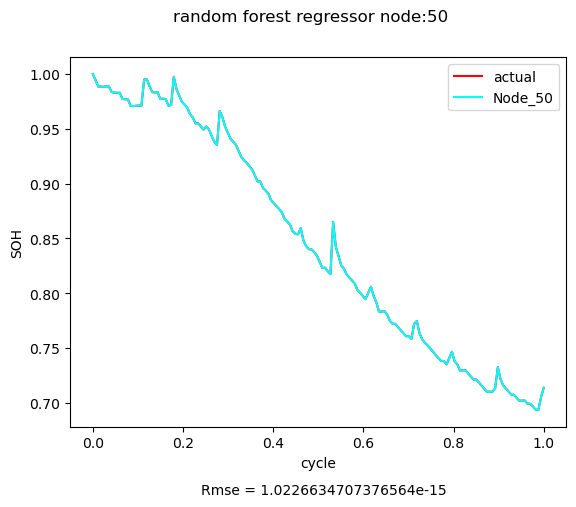

1.0226634707376564e-15


In [19]:
graph_plot(X_axis,y_pred_2,"50")#1.0149876197642483e-15

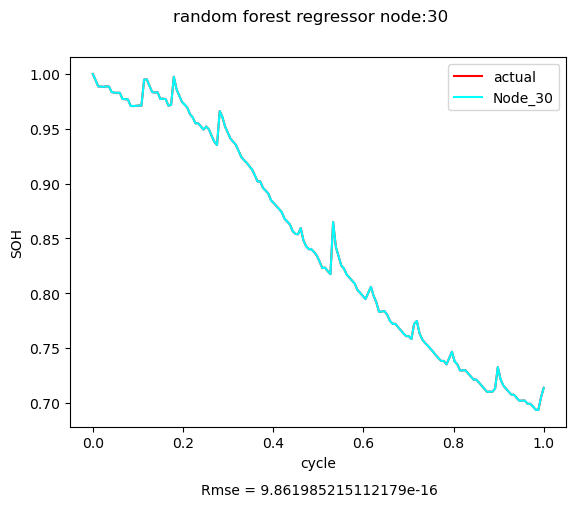

9.861985215112179e-16


In [20]:
graph_plot(X_axis,y_pred_3,"30")#9.906626239995839e-16